## heart disease prediction model
Heart disease is a very crucial illness that most been taken seriously.There are alot of factors that can contribute to heart disease 

#### problem statement 
The hospital seeks to find a model That predicts if a patient has heart disease or not,so treatment can be carried out

#### Data
The data was downloaded from kaggle dataset

#### Evaluation
if we can have an accuracy score of 95%, then we can say we have a good model.Other classification metrics should also be carried out 

In [1]:


# import stantard tools
# tools for EDA and  data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#modelling tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lazypredict.Supervised import LazyClassifier

#evaluation
from sklearn.model_selection  import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [3]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


((303, 14), None)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
# skewness score
df.skew()

age        -0.20
sex        -0.79
cp          0.48
trestbps    0.71
chol        1.14
fbs         1.99
restecg     0.16
thalach    -0.54
exang       0.74
oldpeak     1.27
slope      -0.51
ca          1.31
thal       -0.48
target     -0.18
dtype: float64

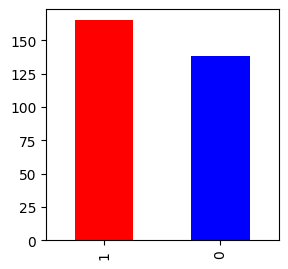

In [8]:
df['target'].value_counts().plot(figsize=(3,3),kind='bar',color=['red','blue']);

## Heart disease frequency according to sex
comparing the target label with sex of patients

In [9]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


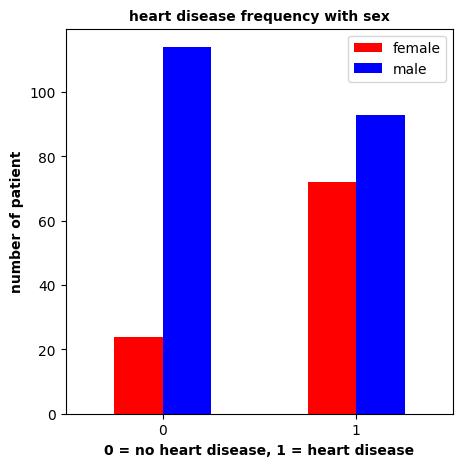

In [10]:
#visualization
pd.crosstab(df['target'],df['sex']).plot(figsize=(5,5),kind='bar',color=['red','blue'])
plt.title('heart disease frequency with sex',fontweight='bold',fontsize=10)
plt.xlabel('0 = no heart disease, 1 = heart disease',fontweight='bold')
plt.ylabel('number of patient',fontweight='bold')
plt.legend(['female','male'])
plt.xticks(rotation=0);


## Age vs Max Heart Rate for Heart disease

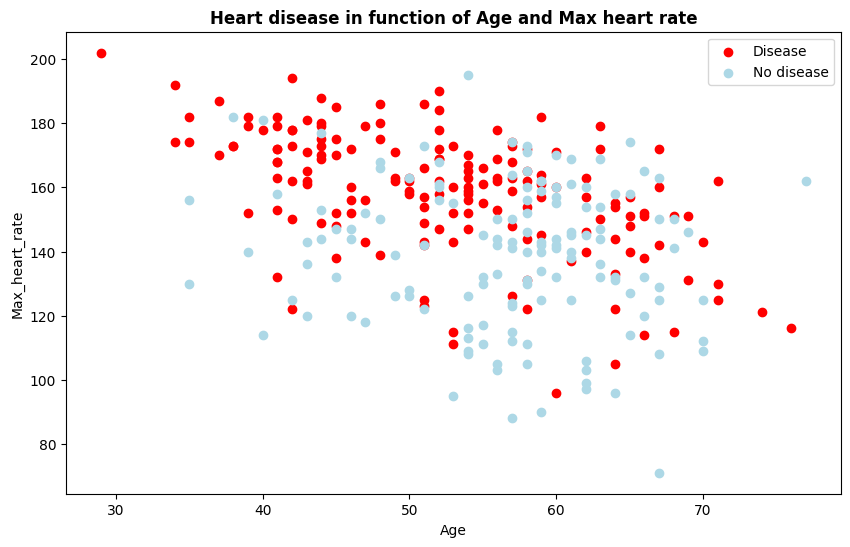

In [11]:
plt.figure(figsize=(10,6))
#scatter for positive target
plt.scatter(df['age'][df['target']==1],
           df['thalach'][df['target']==1],
           color = 'red');
#scatter for negative target
plt.scatter(df['age'][df['target']==0],
            df['thalach'][df['target']==0],
            color = 'lightblue')
plt.title('Heart disease in function of Age and Max heart rate',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Max_heart_rate')
plt.legend(['Disease','No disease'])
plt.xticks(rotation=0);

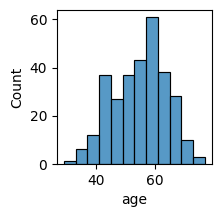

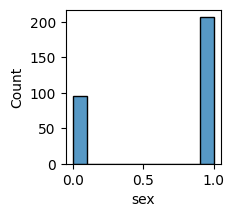

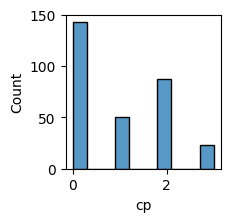

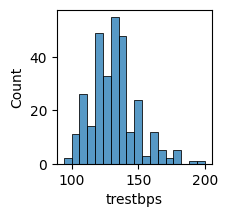

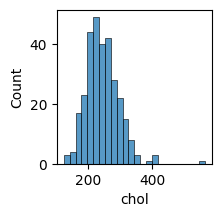

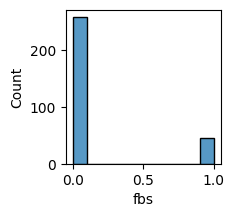

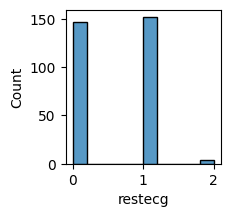

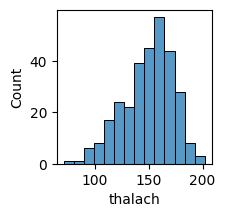

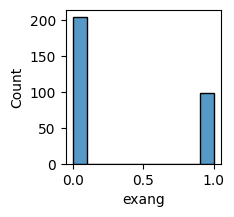

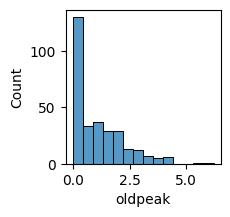

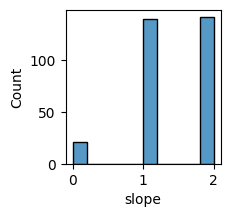

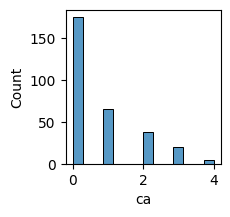

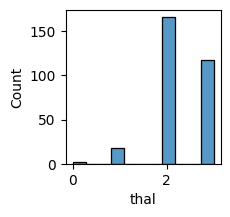

In [21]:
# distribution of each feature
for col in df.columns :
    if col != 'target':
        if pd.api.types.is_numeric_dtype(df[col]):
            fig,ax = plt.subplots(figsize = (2,2))
            ax = sns.histplot(df[col])

## Heart Disease Frequency per chest pain type
cp = chest pain type

    0.typical angina : chest pain related,decrease in blood supply
            to the heart.
            
    1.Atypical angina : chest pain not related to heart disease
    
    2.Non-anginal pain;typically esophaqeal spasms(non heart related)
    
    3.Asymptomatic;chest pain not showing signs of heart disease 
        

In [15]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


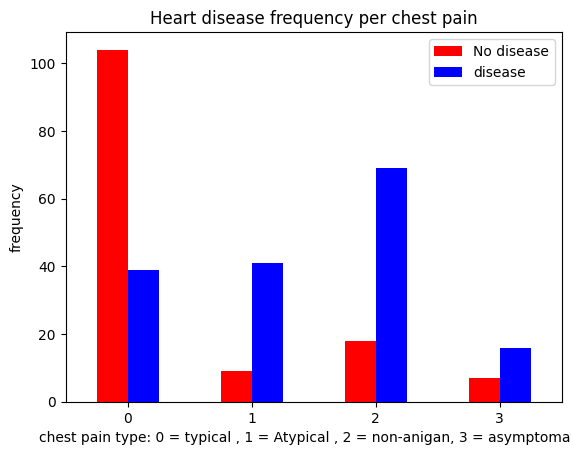

In [16]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar',color = ['red',
                                                            'blue'])
plt.title('Heart disease frequency per chest pain')
plt.xlabel('chest pain type: 0 = typical , 1 = Atypical , 2 = non-anigan, 3 = asymptomatic')
plt.ylabel('frequency')
plt.legend(['No disease','disease'])
plt.xticks(rotation=0); 

In [17]:
# correlation analysis
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


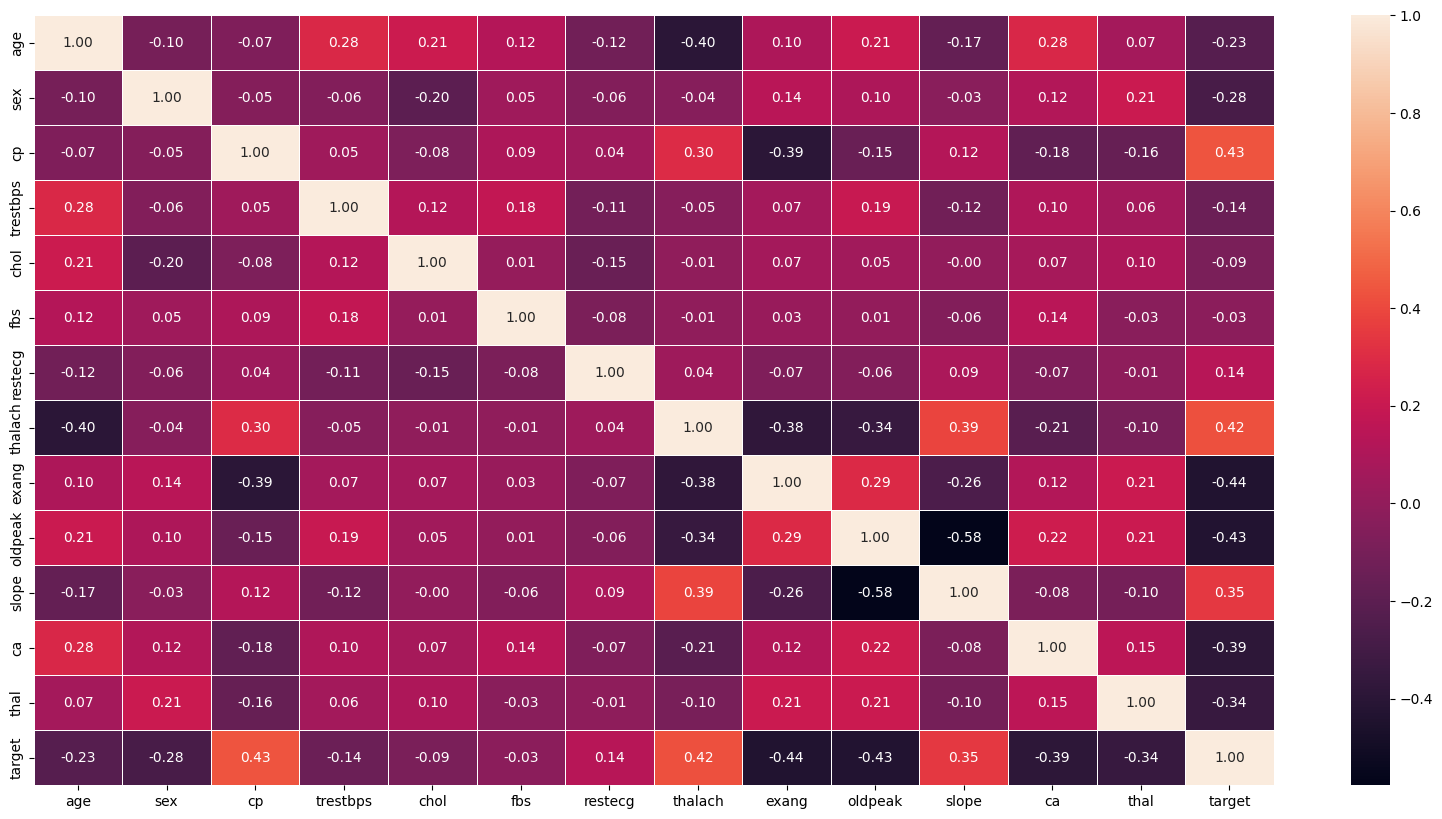

In [18]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths =0.5,
                 fmt = '.2F');

**comment** The features in the dataset are not really correlated to the target label

# MODEL BUILDING

In [19]:
# split data into train and test set
x = df.drop('target',axis = 1)
y = df['target']

#PREPROCESSING DATA
new_x = [col for col in x.columns ]
transformer = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('skewness',QuantileTransformer(n_quantiles = 303))])

preprocessor = ColumnTransformer([
    ('transform',transformer,new_x)
])

transformed_x = preprocessor.fit_transform(x)


In [20]:
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size = 0.2,random_state = 42)

In [21]:
models = {'logistic regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random forest' : RandomForestClassifier()}

def fit_and_score(model,x_train,x_test,y_train,y_test):
    '''
    fit and score the different models
    model : model to be trained
    x_train: the feature training set
    x_test : x test set
    y_train : label training set
    y_test : label test set
    '''
    np.random.seed(42)
    model_scores = {}
    #loop through  models and fit models
    for name,model in models.items() :
        model.fit(x_train,y_train)
        # evaluate and append
        model_scores[name] = model.score(x_test,y_test)
    return model_scores     

In [22]:
model_scores = fit_and_score(model = models,x_train=x_train,x_test=x_test,
              y_train=y_train,y_test=y_test)

In [23]:
compare_model = pd.DataFrame(model_scores,index = ['Accuracy'])
compare_model

,logistic regression,KNN,Random forest
Accuracy,0.87,0.85,0.84


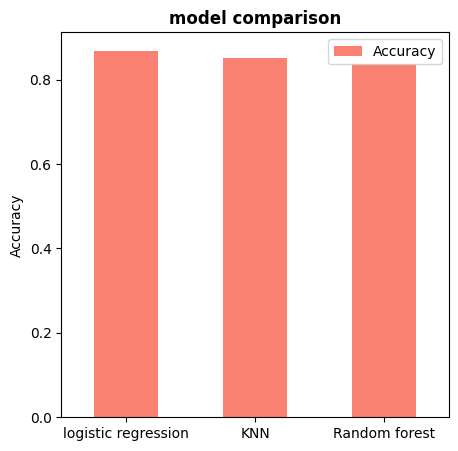

In [24]:
# visualization of accuracy score
compare_model.T.plot.bar(figsize = (5,5),color = 'salmon');
plt.title('model comparison',fontweight='bold');
plt.ylabel('Accuracy')
plt.xticks(rotation=0);

## hyperparameter tuning

using RandomizedSearchCV

In [25]:
# setup grid for LogisticRegression

log_reg_grid = {'penalty' : ['l1','l2'],
                'C' : np.logspace(-8,10,50),
                'solver' : [ 'liblinear',],
                'multi_class' : ['auto', 'ovr'],
                 'random_state' : [None,42],
                'max_iter' : [100,200,500]
                }

#grid for randomforestclasifier
rs_rf_grid = {'n_estimators' : np.arange(10,100,50),
              'max_depth' : [None,3,5,10],
              'min_samples_split': np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,20,2),
             }


In [26]:
# Tuning logistic regression

np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                n_iter=1000,cv=5,verbose=True)

#fit randomizedsearchcv for logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=1000,
                   param_distributions={'C': array([1.00000000e-08, 2.32995181e-08, 5.42867544e-08, 1.26485522e-07,
       2.94705170e-07, 6.86648845e-07, 1.59985872e-06, 3.72759372e-06,
       8.68511374e-06, 2.02358965e-05, 4.71486636e-05, 1.09854114e-04,
       2.55954792e-04, 5.96362332e-04, 1.38949549e-03, 3.23745754e-03,
       7.54312006e...
       1.67683294e+05, 3.90693994e+05, 9.10298178e+05, 2.12095089e+06,
       4.94171336e+06, 1.15139540e+07, 2.68269580e+07, 6.25055193e+07,
       1.45634848e+08, 3.39322177e+08, 7.90604321e+08, 1.84206997e+09,
       4.29193426e+09, 1.00000000e+10]),
                                        'max_iter': [100, 200, 500],
                                        'multi_class': ['auto', 'ovr'],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [None, 42],
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear',
 'random_state': 42,
 'penalty': 'l1',
 'multi_class': 'auto',
 'max_iter': 200,
 'C': 0.5179474679231213}

In [29]:
# randomforest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rs_rf_grid,
                           cv=5,n_iter=500,verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=500,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [30]:
rs_rf.score(x_test,y_test),rs_rf.best_params_

(0.8524590163934426,
 {'n_estimators': 10,
  'min_samples_split': 14,
  'min_samples_leaf': 13,
  'max_depth': 3})

 ## Hyperparameter tuning using gridsearchcv

In [31]:
log_reg_grid ={'penalty' : ['l1','l2'],
                'C' : np.logspace(-8,10,50),
                'solver' : [ 'liblinear',],
                'multi_class' : [ 'ovr','auto'],
               'random_state' : [None]
                
                }

gs_log_reg = GridSearchCV(LogisticRegression(),param_grid = log_reg_grid,
                          cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-08, 2.32995181e-08, 5.42867544e-08, 1.26485522e-07,
       2.94705170e-07, 6.86648845e-07, 1.59985872e-06, 3.72759372e-06,
       8.68511374e-06, 2.02358965e-05, 4.71486636e-05, 1.09854114e-04,
       2.55954792e-04, 5.96362332e-04, 1.38949549e-03, 3.23745754e-03,
       7.54312006e-03, 1.75751062e-02, 4.094915...
       5.68986603e+03, 1.32571137e+04, 3.08884360e+04, 7.19685673e+04,
       1.67683294e+05, 3.90693994e+05, 9.10298178e+05, 2.12095089e+06,
       4.94171336e+06, 1.15139540e+07, 2.68269580e+07, 6.25055193e+07,
       1.45634848e+08, 3.39322177e+08, 7.90604321e+08, 1.84206997e+09,
       4.29193426e+09, 1.00000000e+10]),
                         'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2'], 'random_state': [None],
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_,gs_log_reg.score(x_test,y_test)

({'C': 0.5179474679231213,
  'multi_class': 'ovr',
  'penalty': 'l1',
  'random_state': None,
  'solver': 'liblinear'},
 0.8852459016393442)

In [33]:
gs_rf_grid = {'n_estimators' : np.arange(10,100,50),
              'max_depth' : [None,3,5,10],
              'min_samples_split': np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,20,2)
            }

gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = gs_rf_grid,
                     cv= 5,verbose=True)

gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 60])},
             verbose=True)

In [34]:
gs_rf.score(x_test,y_test)

0.8852459016393442

## Model Evaluation

* roc curve and auc score
* classification report
* precision
* recall
* f1_score
* cofusion matrix

i will be using cross validation where possible

In [35]:
# making predictions on the x_test
y_preds = gs_log_reg.predict(x_test)

In [36]:
y_preds

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

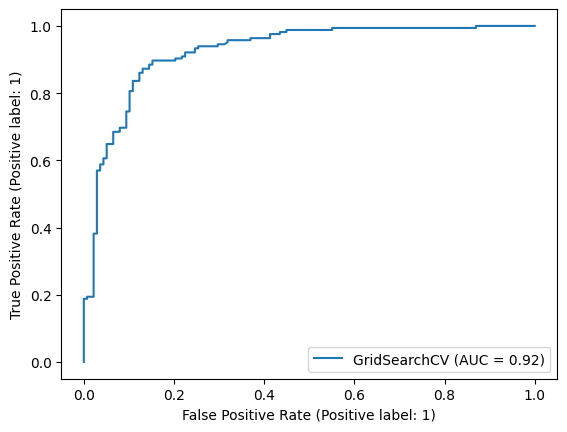

In [37]:
# plot roc curve and calculate auc score
plot_roc_curve(gs_log_reg,transformed_x,y);

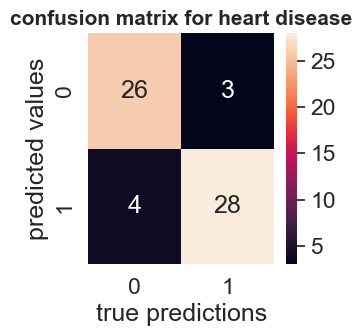

In [38]:
# confusion matrix
def plot_conf_mat(y_test,y_preds):
    sns.set(font_scale = 1.5)
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot = True)
    plt.xlabel('true predictions')
    plt.ylabel('predicted values')
    plt.title('confusion matrix for heart disease',fontsize = 15,fontweight = 'bold')
    
    
# test function
plot_conf_mat(y_test,y_preds)

In [39]:
# classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



**using cross validation score, evaluating accuracy,precision,recall,f1_score of the model**

In [40]:
# instantiate and new logistic regression model with the best params
clf = LogisticRegression(C = 0.5179474679231213,
                          multi_class = 'ovr',
                          penalty = 'l1',
                          random_state = None,
                          solver = 'liblinear')

In [41]:
# cross validated accuracy
cross_acc = cross_val_score(clf,
                            transformed_x,
                            y,
                            cv = 5,
                            scoring = 'accuracy')
cross_acc

array([0.86885246, 0.8852459 , 0.85245902, 0.83333333, 0.8       ])

In [42]:
acc = np.mean(cross_acc)*100

In [43]:
# cross validated precision
cross_pre = cross_val_score(clf,
                            transformed_x,
                            y,
                            cv = 5,
                            scoring = 'precision')
cross_pre

array([0.83783784, 0.90625   , 0.875     , 0.84848485, 0.76923077])

In [44]:
pre = np.mean(cross_pre)*100

In [45]:
# cross validated recall
cross_rec = cross_val_score(clf,
                            transformed_x,
                            y,
                            cv = 5,
                            scoring = 'recall')
cross_rec

array([0.93939394, 0.87878788, 0.84848485, 0.84848485, 0.90909091])

In [46]:
rec = np.mean(cross_rec)*100

In [47]:
# cross validated f1_score
cross_f1 = cross_val_score(clf,
                            transformed_x,
                            y,
                            cv = 5,
                            scoring = 'f1')
cross_f1

array([0.88571429, 0.89230769, 0.86153846, 0.84848485, 0.83333333])

In [48]:
f1  = np.mean(cross_f1)*100

In [49]:
cv_metrics = pd.DataFrame({
            'accuracy' : acc,
            'precision' : pre,
            'recall' : rec,
            'f1' : f1},
            index=[0]
                    )

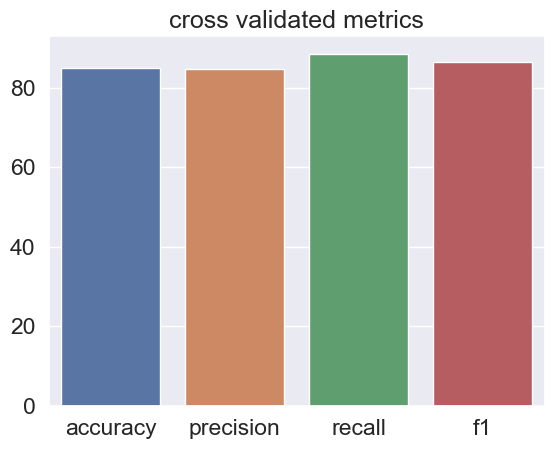

In [50]:
# graph of cross validation metrics
sns.barplot(cv_metrics)
plt.title('cross validated metrics');

## feature importance

In [51]:
# instantiate model
clf_2 = LogisticRegression(C = 0.5179474679231213,
                          multi_class = 'ovr',
                          penalty = 'l1',
                          random_state = None,
                          solver = 'liblinear')
clf_2.fit(x_train,y_train)

LogisticRegression(C=0.5179474679231213, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [52]:
# check for coef_
clf_2.coef_

array([[ 0.        , -0.95729089,  1.81594386,  0.        ,  0.        ,
         0.        ,  0.27437019,  0.59407497, -0.82345583,  0.        ,
         1.84222933, -2.14370046, -1.01916168]])

In [53]:
feature_dict = dict(zip(df.columns,list(clf_2.coef_[0])))
feature_dict

{'age': 0.0,
 'sex': -0.9572908949972461,
 'cp': 1.8159438578083391,
 'trestbps': 0.0,
 'chol': 0.0,
 'fbs': 0.0,
 'restecg': 0.274370189951023,
 'thalach': 0.5940749671839834,
 'exang': -0.8234558276462395,
 'oldpeak': 0.0,
 'slope': 1.8422293271086763,
 'ca': -2.1437004585487833,
 'thal': -1.0191616800152796}

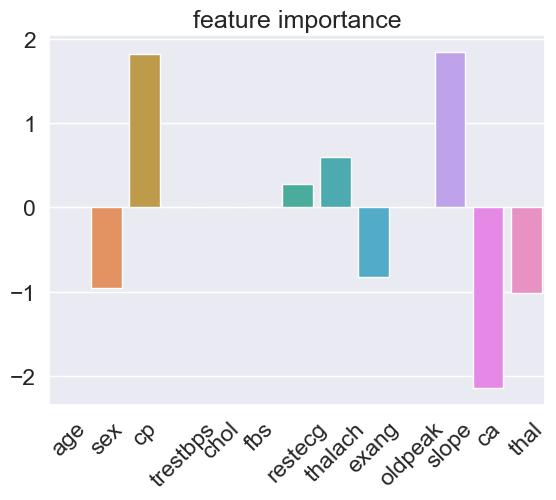

In [54]:
# visualising
feature_df = pd.DataFrame(feature_dict,index = [0])
sns.barplot(feature_df)
plt.title('feature importance')
plt.xticks(rotation = 45);